In [1]:
import os
from diffaux.validation.read_size_validation_data import read_size_data, validation_info
from diffaux.validation.read_size_validation_data import get_author_list

##  Get Validation Data and Plot Behavior

In [2]:
authors_rm = get_author_list(validation_info["Re_vs_Mstar"])
authors_re = get_author_list(validation_info["Re_vs_z_data"])

authors =  ['kawinwanichakij_2021', 'mowla_2019', 'george_2024_3000', 'george_2024_5000']
authors =  ['mowla_2019', 'kawinwanichakij_2021']


In [ ]:
Redata = read_size_data({}, authors_re, info_key="Re_vs_z_data")

In [3]:
Rmdata = read_size_data({}, authors_rm, info_key="Re_vs_Mstar")

Reading data from /Users/kovacs/anaconda3/envs/diffaux/lib/python3.12/site-packages/diffaux/data/GalaxySizes/kawinwanichakij_2021/kawinwanichakij_Table5b_Re_vs_Mstar_fits.txt
..Copying z_med to z_med_Quiescent
..Assigning symmetric errors for dA_Quiescent-
..Assigning symmetric errors for dalpha_Quiescent-
..Copying z_med to z_med_Starforming
..Assigning symmetric errors for dA_Starforming-
..Assigning symmetric errors for dalpha_Starforming-
Reading data from /Users/kovacs/anaconda3/envs/diffaux/lib/python3.12/site-packages/diffaux/data/GalaxySizes/mowla_2019/mowla_2019_Table2_Re_vs_Mstar_fits.txt
..Copying z_med to z_med_All
..Converting logA_All from log to A_All
..Converting dlogA_All+ from log to dA_All+
..Assigning symmetric errors for dA_All-
..Assigning symmetric errors for dalpha_All-
..Dividing A_All by M_p conversion factor 1.4**alpha -> A_All_M_p_rescaled
..Dividing dA_All+ by M_p conversion factor 1.4**alpha -> dA_All+_M_p_rescaled
..Dividing dA_All- by M_p conversion fact

In [4]:
authors = get_author_list(validation_info["Re_vs_z"])
data = read_size_data({}, authors, info_key="Re_vs_z")

authors =  ['martorano_2024', 'george_2024_3000', 'george_2024_5000', 'kawinwanichakij_2021', 'mowla_2019', 'vanderWel_2014']
Reading data from /Users/kovacs/anaconda3/envs/diffaux/lib/python3.12/site-packages/diffaux/data/GalaxySizes/martorano_2024/martorano_2024_table2_Re_vs_z.txt
Flipping sign of beta_All
Flipping sign of beta_Starforming
Flipping sign of beta_Quiescent
..Converting alpha_All from log to B_All
..Converting dalpha_All+ from log to dB_All+
..Converting alpha_Starforming from log to B_Starforming
..Converting dalpha_Starforming+ from log to dB_Starforming+
..Converting alpha_Quiescent from log to B_Quiescent
..Converting dalpha_Quiescent+ from log to dB_Quiescent+
Reading data from /Users/kovacs/anaconda3/envs/diffaux/lib/python3.12/site-packages/diffaux/data/GalaxySizes/george_2024_3000/George_2024_Table3a_3000_Re_vs_z.txt
Flipping sign of beta_Starforming
Flipping sign of beta_Quiescent
..Assigning symmetric errors for dB_Starforming-
..Assigning symmetric errors for

In [ ]:
authors_rd = get_author_list(validation_info["Re_vs_Mstar_data"])
Rddata = {}
for author in authors_rd:
    samples = validation_info["Re_vs_Mstar_data"][author]["samples"]
    for sample in samples:
        if "All" not in sample:
            Rddata = read_size_data(Rddata, authors_rd, info_key="Re_vs_Mstar_data", sample=sample)

In [6]:
notebook_dir = "/Users/kovacs/cosmology/diff_notebooks"
from diffaux.validation.plot_size_data import plot_size_data
from diffaux.validation.plot_size_data import PLOT_DRN

In [ ]:
plot_size_data(
    Rddata,
    validation_info,
    authors,
    info_keys=["Re_vs_Mstar_data"],
    plotdir=os.path.join(notebook_dir, PLOT_DRN),
)

In [ ]:
plot_size_data(
    Redata,
    validation_info,
    authors,
    info_keys=["Re_vs_z_data"],
    plotdir=os.path.join(notebook_dir, PLOT_DRN),
    summary_only=True,
)

### Plot Behavior of Fit Coefficients for Median Sizes

..Note: Plotting A_Starforming_M_p_rescaled for mowla_2019 in summary
..Note: Plotting A_Quiescent_M_p_rescaled for mowla_2019 in summary
Saving /Users/kovacs/cosmology/diff_notebooks/./SizePlots/Re_vs_Mstar_summary


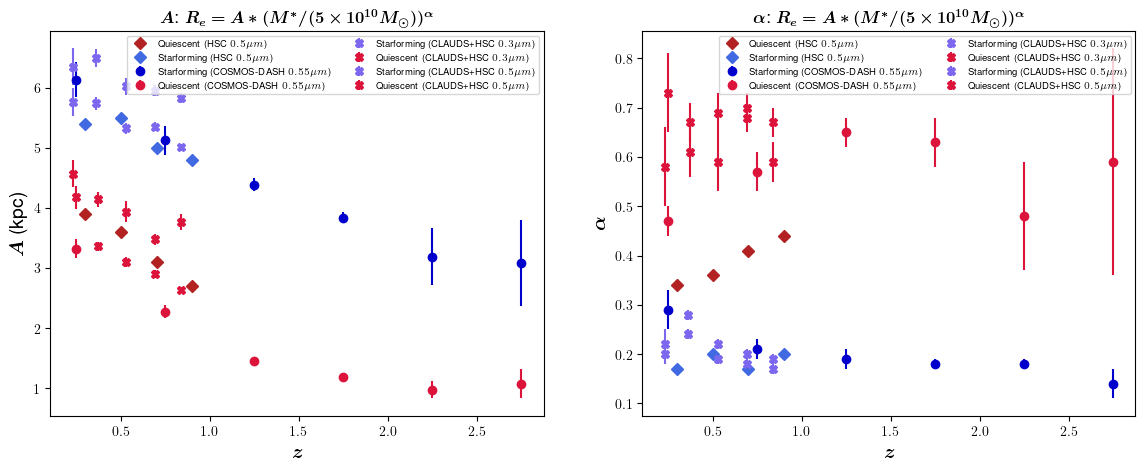

In [7]:
plot_size_data(
    Rmdata,
    validation_info,
    authors_rm,
    info_keys=["Re_vs_Mstar"],
    summary_only=True,
    plotdir=os.path.join(notebook_dir, PLOT_DRN),
)

In [ ]:
plot_size_data(
    data,
    validation_info,
    authors,
    info_keys=["Re_vs_z"],
    plotdir=os.path.join(notebook_dir, PLOT_DRN),
    summary_only=True,
)

## Setup Choices for Fitting the Behavior of Median Sizes with z

In [15]:
from diffaux.size_modeling.fit_size_data import Samples_zFit
from diffaux.size_modeling.fit_size_data import zFitParams_initial

print(zFitParams_initial)
print(Samples_zFit)

zFitParameters(B_Starforming=SigmoidParameters(x0=11.5, k=2.7, ymin=3.0, ymax=40.0), beta_Starforming=SigmoidParameters(x0=11.3, k=2.5, ymin=0.15, ymax=2.5), B_Quiescent=SigmoidParameters(x0=11.0, k=3.6, ymin=1.5, ymax=16.0), beta_Quiescent=SigmoidParameters(x0=10.0, k=8.0, ymin=0.4, ymax=1.2))
['Starforming', 'Quiescent']


In [13]:
from diffaux.size_modeling.fit_size_data import collect_data_vectors

# authors_fit = get_author_list(validation_info['Re_vs_z'], lambda_min=0.5, lambda_max=1.0)
# data_fit = read_size_data({}, authors_fit, info_key='Re_vs_z')
data_vectors = collect_data_vectors(
    data, Samples_zFit, validation_info, fit_type="Re_vs_z", lambda_min=0.5, lambda_max=1.0
)
print(data_vectors)

Skipping martorano_2024 1.5
Skipping george_2024_3000 0.3
Processing george_2024_5000 0.5
Processing kawinwanichakij_2021 0.5
Processing mowla_2019 0.55
Processing vanderWel_2014 0.5
Skipping martorano_2024 1.5
Skipping george_2024_3000 0.3
Processing george_2024_5000 0.5
Processing kawinwanichakij_2021 0.5
Processing mowla_2019 0.55
Processing vanderWel_2014 0.5
{'Re_vs_z': {'M*med_Starforming': array([ 9.7 , 10.2 , 10.7 , 11.2 , 10.05, 10.5 , 10.9 , 11.4 , 10.  ,
       10.5 , 11.  , 11.3 , 11.43,  9.25,  9.75, 10.25, 10.75, 11.25]), 'B_Starforming': array([ 3.59      ,  4.75      ,  6.28      ,  8.37      ,  4.28      ,
        5.05      ,  9.07      , 15.09      ,  5.1       ,  6.3       ,
       11.        , 20.2       , 25.4       ,  3.4673685 ,  4.89778819,
        5.49540874,  7.94328235, 11.22018454]), 'dB_Starforming+': array([0.3       , 0.28      , 0.38      , 0.76      , 0.02      ,
       0.02      , 0.12      , 1.38      , 0.2       , 0.2       ,
       0.3       , 1.1  

In [10]:
# print(data_vectors)
from diffaux.size_modeling.fit_size_data import assign_p0_values_to_fits

# assign initial values to fits dict and plot
fits = assign_p0_values_to_fits(zFitParams_initial, fit_type="Re_vs_z")

In [11]:
from diffaux.validation.plot_size_fits import plot_fits

### Plot Initial Guess for Fit Results and Compare to Data

Saving /Users/kovacs/cosmology/diff_notebooks/./SizePlots/Fit_Re_vs_z_InitialGuess.png


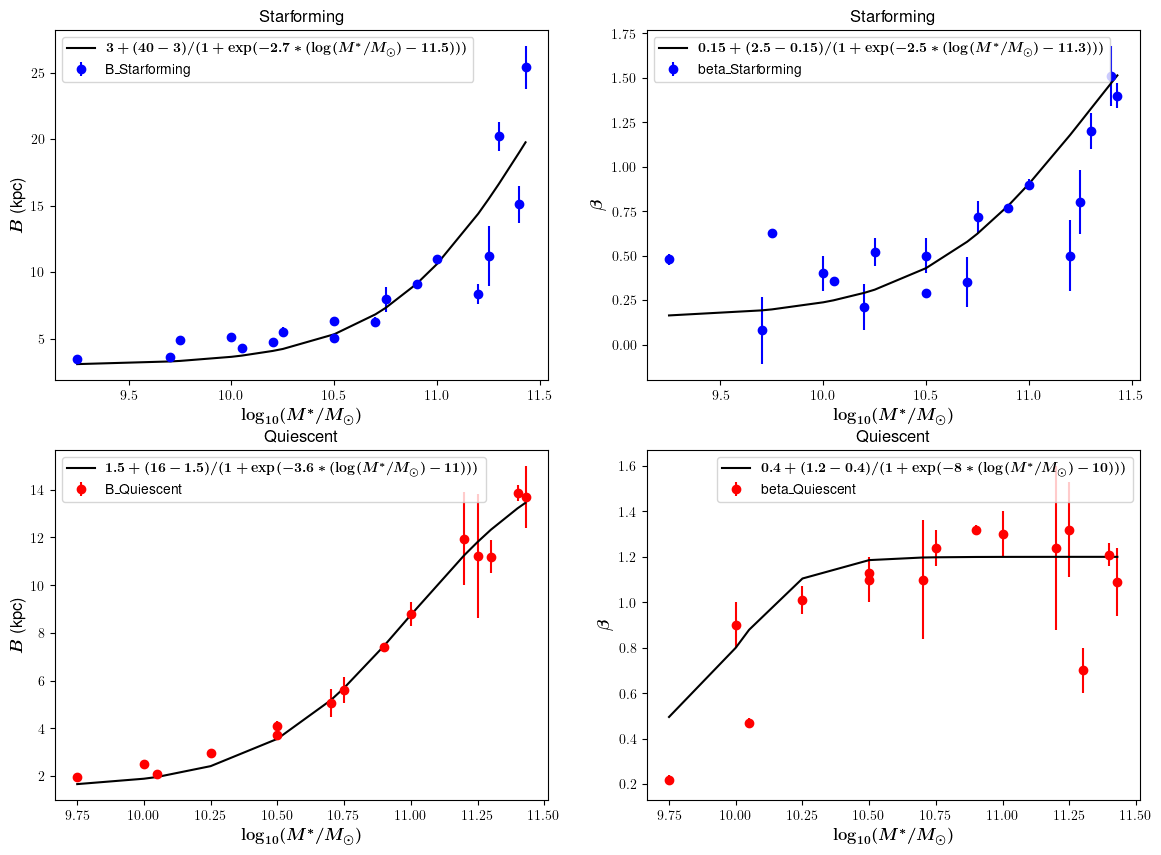

In [12]:
fit_type = "Re_vs_z"
plot_fits(
    fits[fit_type],
    data_vectors[fit_type],
    Samples_zFit,
    validation_info[fit_type],
    plotdir=os.path.join(notebook_dir, PLOT_DRN),
    title="_InitialGuess",
)

## Fit the Coefficients and Save Results

In [ ]:
fit_type = "Re_vs_z"
from diffaux.size_modeling.fit_size_data import fit_parameters, _sigmoid

fits = {}
from diffaux.size_modeling.fit_size_data import Xvalue_zFit

print(zFitParams_initial)
fits[fit_type] = fit_parameters(data_vectors[fit_type], Xvalue_zFit, zFitParams_initial, func=_sigmoid)

In [ ]:
# print(fits)
author_list = get_author_list(validation_info["Re_vs_z"], lambda_min=0.5, lambda_max=1.0)
plot_fits(
    fits[fit_type],
    data_vectors[fit_type],
    Samples_zFit,
    validation_info[fit_type],
    func=_sigmoid,
    data=data[fit_type],
    authors=author_list,
    plotdir=os.path.join(notebook_dir, PLOT_DRN),
)

In [ ]:
import pickle
from diffaux.size_modeling.fit_size_data import zFitParameters
from diffaux.size_modeling.fit_size_data import write_fit_parameters, read_fit_parameters

In [ ]:
# write_fit_parameters(fits, fitdir=os.path.join(fit_dir, FIT_DRN))
write_fit_parameters(fits, fitdir="./")

## Read in Fit Parameters and Generate Sizes

In [ ]:
fit_pars, fits = read_fit_parameters(zFitParameters)
print(fit_pars)

In [ ]:
# generate sizes
import numpy as np
from diffaux.size_modeling.fit_size_data import generate_sizes, get_color_mask, _sigmoid, median_size_vs_z

fit_func = _sigmoid
size_func = median_size_vs_z
N = 5000
lM_lo = 9.0
lM_hi = 12.0
z_lo = 0.0
z_hi = 3.0
log_Mstar = np.random.uniform(low=lM_lo, high=lM_hi, size=N)
redshift = np.random.uniform(low=z_lo, high=z_hi, size=N)
color_gal = np.random.uniform(low=-0.2, high=2.3, size=N)
# print(log_Mstar, redshift, color)

In [ ]:
Re, R_med, scatter_up, scatter_down = generate_sizes(
    fit_pars, log_Mstar, redshift, color_gal, samples=Samples_zFit, fit_type="Re_vs_z",
)
print(np.min(R_med), np.max(R_med))
print(np.min(Re), np.max(Re))

## Plot Results and Compare Generated Sizes with Validation Data

In [ ]:
tests = [Redata, Rddata]

In [ ]:
# make validation plots using data for measured sizes and median sizes
from diffaux.validation.plot_size_fits import plot_generated_sizes

for test, ikey in zip(tests, ["Re_vs_z_data", "Re_vs_Mstar_data"]):
    authors = get_author_list(validation_info[ikey])
    plot_generated_sizes(
        Re,
        R_med,
        color_gal,
        log_Mstar,
        redshift,
        Samples_zFit,
        authors,
        test[ikey],
        validation_info[ikey],
        plotdir=os.path.join(notebook_dir, PLOT_DRN),
    )

In [ ]:
# test behavior of R_med
from diffaux.validation.plot_size_fits import plot_re_median

In [ ]:
plot_re_median(fit_pars, Samples_zFit, plotdir=os.path.join(notebook_dir, PLOT_DRN))

### Run test for generated sizes: 

In [ ]:
# Test use facing functions
from diffaux.size_modeling.tests.test_generate_sizes import test_generate_sizes

In [ ]:
# Run the test in write mode to generate test data
test_generate_sizes(read=False, testdata_dir="./")

In [ ]:
# Run the test in read mode to read test data and compare with tthe user facing function
test_generate_sizes(read=True)